# Twitter Analysis

0.1 Installing Kaggle library and other settings

In [2]:
#installing kaggle library
! pip install kaggle

In [1]:
# confirming the path of kaggle.json file
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
# API to fetch the dataset kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 89% 72.0M/80.9M [00:00<00:00, 170MB/s]
100% 80.9M/80.9M [00:00<00:00, 177MB/s]


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile
df = '/content/sentiment140.zip'
with ZipFile(df, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


1.1 Importing other libraries

In [6]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# loading the data from csv file to pandas dataframe
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

In [10]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


According to the first five raws the column names are not mentioned.

In [11]:
# Nominating the columns names
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=column_names, encoding='ISO-8859-1')

In [12]:
1 # checking the number of columns and raws
twitter_data.shape

(1600000, 6)

In [13]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<ipython-input-14-e09e405e7c8e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitter_data, x='target', palette='Set2')


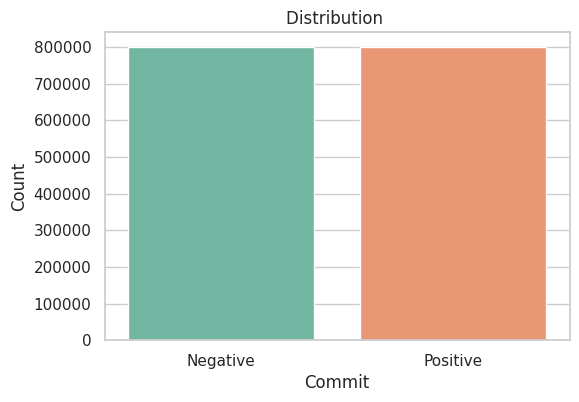

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a countplot to visualize the distribution of sentiments
plt.figure(figsize=(6, 4))
sns.countplot(data=twitter_data, x='target', palette='Set2')
plt.xlabel('Commit')
plt.ylabel('Count')
plt.title('Distribution ')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Customize the x-axis labels
plt.show()


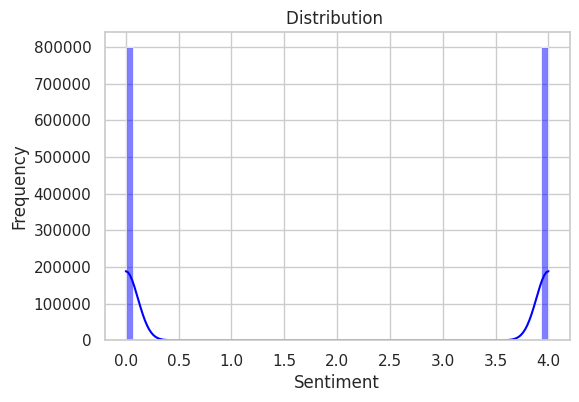

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create the distribution plot
plt.figure(figsize=(6, 4))
sns.histplot(data=twitter_data, x='target', kde=True, color='blue')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution ')

# Show the plot
plt.show()


<ipython-input-16-d090ae383a80>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=twitter_data, x='target', y='id', palette='Set2')


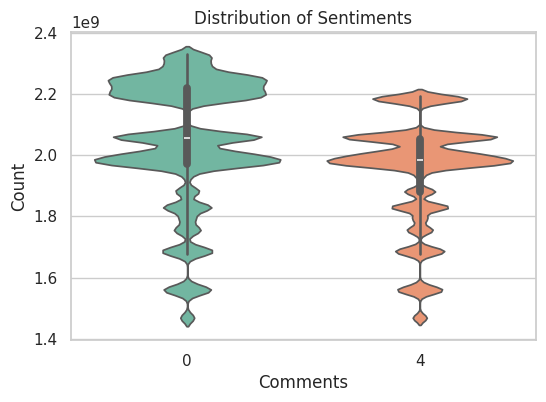

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")


# Create a violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(data=twitter_data, x='target', y='id', palette='Set2')
plt.xlabel('Comments')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()


In [17]:
!pip install gender-guesser


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 3.1 MB/s eta 0:00:00


In [18]:
import pandas as pd
from gender_guesser.detector import Detector

# Load the dataset containing usernames
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=column_names, encoding='ISO-8859-1')

# Initialize the gender detector
detector = Detector()

# Function to infer gender from first name
def infer_gender(username):
    first_name = username.split('_')[0]  # Assuming username format is 'firstname_lastname'
    gender = detector.get_gender(first_name)
    return gender

# Apply the function to infer gender for each user
twitter_data['gender'] = twitter_data['user'].apply(infer_gender)

# Define a list of common business terms
business_terms = ['business', 'llc', 'inc', 'corp', 'company', 'enterprise', 'consulting']

# Function to identify potential business accounts
def identify_business(username):
    for term in business_terms:
        if term in username.lower():
            return 'Business'
    return 'Personal'

# Apply the function to identify user type
twitter_data['user_type'] = twitter_data['user'].apply(identify_business)

# Display the result
print(twitter_data[['user', 'gender', 'user_type']].head())


              user   gender user_type
0  _TheSpecialOne_  unknown  Personal
1    scotthamilton  unknown  Personal
2         mattycus  unknown  Personal
3          ElleCTF  unknown  Personal
4           Karoli  unknown  Personal


**2.0 Data Preprocessing**

In [19]:
# checking the distributionof target column
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

So in the data set has  mentioned the target as (0 = negative, 4 = positive) but taking only two target values which is more better.

In [20]:
twitter_data.replace({'target':{4:1}}, inplace=True)

In [21]:
# checking the distributionof target column
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

Positive values represents by "4" but converting it as "1" is more suitable.

In [22]:
# counting the missing values
twitter_data.isnull().sum()

target       0
id           0
date         0
flag         0
user         0
text         0
gender       0
user_type    0
dtype: int64

There are no missing values which mean its completeness, that will provide reliables results.

2.1 Checking stopwords

In [23]:
import nltk
from nltk.corpus import stopwords

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')

# Get the list of English stopwords
english_stopwords = stopwords.words('english')

# Print the list of stopwords
print("List of English stopwords:")
print(english_stopwords)


List of English stopwords:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'ow

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to remove stopwords from text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Example text
example_text = "This is an example sentence with some stopwords that need to be removed."

# Remove stopwords from the example text
cleaned_text = remove_stopwords(example_text)

print("Original Text:")
print(example_text)
print("\nText after removing stopwords:")
print(cleaned_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Original Text:
This is an example sentence with some stopwords that need to be removed.

Text after removing stopwords:
example sentence stopwords need removed .


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  2.2 Tokenizing the data

In [25]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Load the data
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=column_names, encoding='ISO-8859-1')

# Tokenize the text data
twitter_data['tokenized_text'] = twitter_data['text'].apply(word_tokenize)

# Display the first few rows of the DataFrame with tokenized text
print(twitter_data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1    scotthamilton  is upset that he can't update his Facebook by ...   
2         mattycus  @Kenichan I dived many times for the ball. Man...   
3          ElleCTF    my whole body feels itchy and like its on fire    
4           Karoli  @nationwideclass no, it's not behaving at all....   

                                      tokenized_text  
0  [@, switchfoot, http, :, //twitpic.com/2y1zl, ...  
1  [is, upset, that, he, ca, n't, update, his, Fa...  
2  [@

2.3 Visualizing the tokenized data

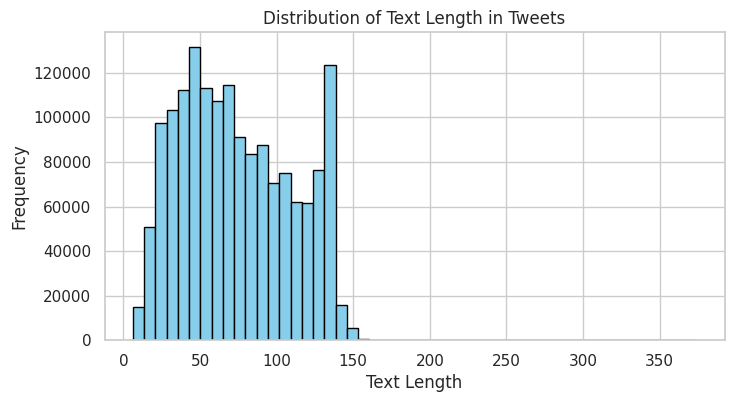

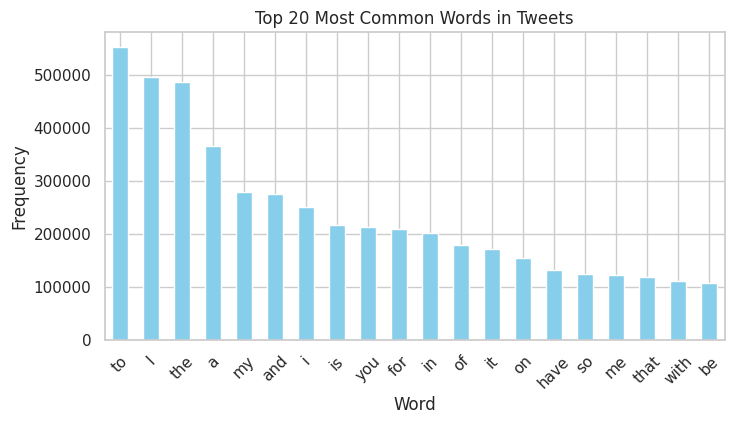

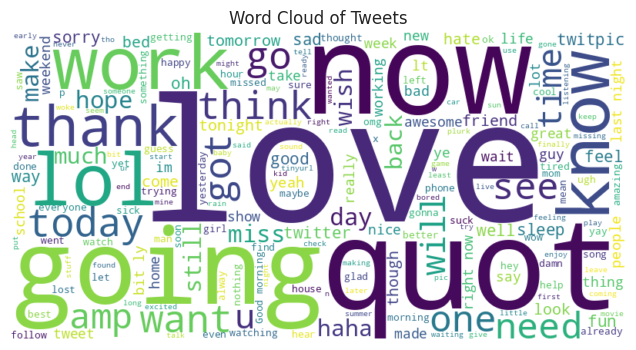

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=column_names, encoding='ISO-8859-1')

# 2. Text Length Analysis
twitter_data['text_length'] = twitter_data['text'].apply(len)

# Plotting text length distribution
plt.figure(figsize=(8, 4))
plt.hist(twitter_data['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length in Tweets')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Word Frequency Analysis
all_words = ' '.join(twitter_data['text'])
word_freq = pd.Series(all_words.split()).value_counts()

# Plotting word frequency distribution
plt.figure(figsize=(8, 4))
word_freq[:20].plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common Words in Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



# 5. Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()


2.4 Lowercasing

In [27]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
# Load the data
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=column_names, encoding='ISO-8859-1')


In [31]:
# Lowercasing
twitter_data['lowercase_text'] = twitter_data['text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x)]))

In [32]:
print(twitter_data.head())

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1    scotthamilton  is upset that he can't update his Facebook by ...   
2         mattycus  @Kenichan I dived many times for the ball. Man...   
3          ElleCTF    my whole body feels itchy and like its on fire    
4           Karoli  @nationwideclass no, it's not behaving at all....   

                                      tokenized_text  \
0  [@, switchfoot, http, :, //twitpic.com/2y1zl, ...   
1  [is, upset, that, he, ca, n't, update, his, Fa...   
2 

In [33]:
# Removing special characters and numbers
twitter_data['clean_text'] = twitter_data['lowercase_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [34]:
print(twitter_data.head())

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1    scotthamilton  is upset that he can't update his Facebook by ...   
2         mattycus  @Kenichan I dived many times for the ball. Man...   
3          ElleCTF    my whole body feels itchy and like its on fire    
4           Karoli  @nationwideclass no, it's not behaving at all....   

                                      tokenized_text  \
0  [@, switchfoot, http, :, //twitpic.com/2y1zl, ...   
1  [is, upset, that, he, ca, n't, update, his, Fa...   
2 

In [35]:
# Lemmatization and stemming
lemmatizer = WordNetLemmatizer()
twitter_data['clean_text'] = twitter_data['clean_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [36]:
print(twitter_data.head())

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1    scotthamilton  is upset that he can't update his Facebook by ...   
2         mattycus  @Kenichan I dived many times for the ball. Man...   
3          ElleCTF    my whole body feels itchy and like its on fire    
4           Karoli  @nationwideclass no, it's not behaving at all....   

                                      tokenized_text  \
0  [@, switchfoot, http, :, //twitpic.com/2y1zl, ...   
1  [is, upset, that, he, ca, n't, update, his, Fa...   
2 

In [37]:
# Display the first few rows of the DataFrame with cleaned text
print(twitter_data[['text', 'clean_text']].head())

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0  switchfoot http twitpiccomyzl awww that s a bu...  
1  is upset that he ca nt update his facebook by ...  
2  kenichan i dived many time for the ball manage...  
3       my whole body feel itchy and like it on fire  
4  nationwideclass no it s not behaving at all i ...  


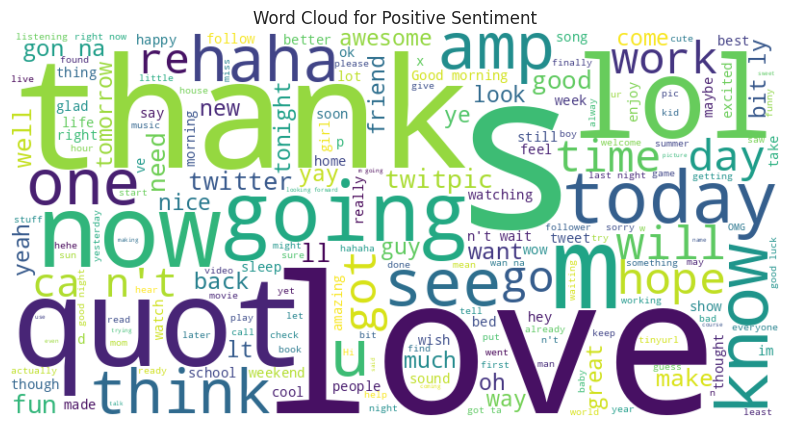

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tokenized text for positive sentiment (assuming positive sentiment is represented by label 4)
positive_tokenized_text = ' '.join(' '.join(tokens) for tokens in twitter_data[twitter_data['target'] == 4]['tokenized_text'])

# Function to generate word cloud from text
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and print word cloud for positive tokenized text
generate_wordcloud(positive_tokenized_text, 'Word Cloud for Positive Sentiment')


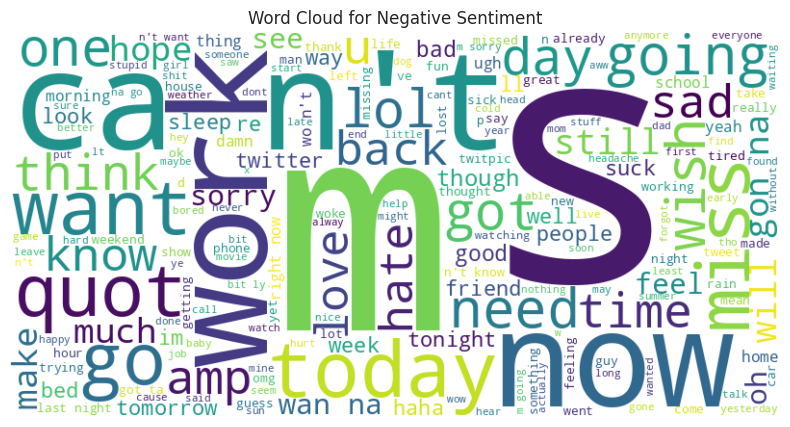

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter tokenized text for negative sentiment (assuming negative sentiment is represented by label 0)
negative_tokenized_text = ' '.join(' '.join(tokens) for tokens in twitter_data[twitter_data['target'] == 0]['tokenized_text'])

# Function to generate word cloud from text
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and print word cloud for negative tokenized text
generate_wordcloud(negative_tokenized_text, 'Word Cloud for Negative Sentiment')


In [41]:
# Separate data (text) and labels
data = twitter_data['clean_text']
labels = twitter_data['target']

# Display the first few rows of data and labels
print("Data (cleaned text):")
print(data.head())
print("\nLabels:")
print(labels.head())


Data (cleaned text):
0    switchfoot http twitpiccomyzl awww that s a bu...
1    is upset that he ca nt update his facebook by ...
2    kenichan i dived many time for the ball manage...
3         my whole body feel itchy and like it on fire
4    nationwideclass no it s not behaving at all i ...
Name: clean_text, dtype: object

Labels:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


Splitting the data to traning and test data

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (1280000,)
Training labels shape: (1280000,)
Test data shape: (320000,)
Test labels shape: (320000,)


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the transformed data
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_train_tfidf: (1280000, 5000)
Shape of X_test_tfidf: (320000, 5000)


In [44]:
# Print TF-IDF representation of the first document in the training set
print("TF-IDF representation of the first document in the training set:")
print(X_train_tfidf[0])


TF-IDF representation of the first document in the training set:
  (0, 2993)	0.16533976849449572
  (0, 3491)	0.24666650103780707
  (0, 390)	0.3165343588140843
  (0, 2866)	0.11721142057737803
  (0, 2231)	0.1267474793613955
  (0, 638)	0.1504745216810361
  (0, 1805)	0.1675620047905787
  (0, 4001)	0.25263733502086555
  (0, 4333)	0.14305773663763588
  (0, 4963)	0.23286024240011116
  (0, 748)	0.38152137290085847
  (0, 3353)	0.374146015937546
  (0, 3130)	0.3771412684953224
  (0, 2509)	0.17319434141421725
  (0, 3449)	0.20777692373257453
  (0, 4936)	0.25876954257367085
  (0, 4846)	0.15709161937071753


Traning the Machine Learning Model

Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# Initialize the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)  # You can adjust max_iter as needed



In [47]:
# Train the model
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Predict on the test data
y_pred = logistic_regression.predict(X_test_tfidf)

In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.792821875


In [50]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           4       0.79      0.81      0.80    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



Model Evaluation

Accuracy score

In [54]:
from sklearn.metrics import accuracy_score

# Predict on the training data
y_train_pred = logistic_regression.predict(X_train_tfidf)

# Calculate accuracy on the training data
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", training_accuracy)


Accuracy on training data: 0.7946859375


In [55]:
from sklearn.metrics import accuracy_score

# Predict on the test data
y_test_pred = logistic_regression.predict(X_test_tfidf)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test data:", test_accuracy)


Accuracy on test data: 0.792821875


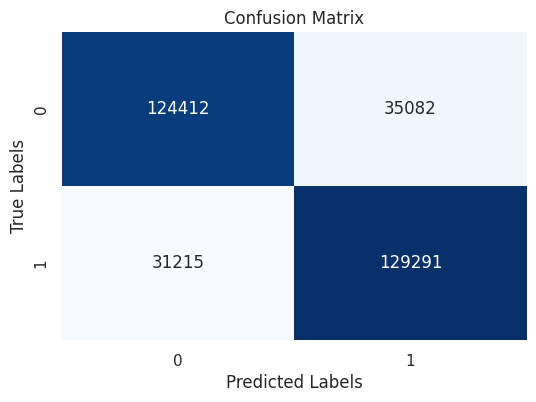

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test data
y_test_pred = logistic_regression.predict(X_test_tfidf)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Hyperparameter Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model with hyperparameters
logistic_regression = LogisticRegression(
    penalty='l2',  # Regularization penalty: 'l1' for Lasso, 'l2' for Ridge
    C=1.0,         # Inverse of regularization strength (smaller values specify stronger regularization)
    solver='lbfgs',# Algorithm to use in the optimization problem: 'liblinear', 'sag', 'saga', 'newton-cg', 'lbfgs'
    max_iter=100,  # Maximum number of iterations for optimization algorithm convergence
    random_state=42 # Random seed for reproducibility
)

# Train the logistic regression model
logistic_regression.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [57]:
print("Logistic Regression Model Hyperparameters:")
print("Penalty:", logistic_regression.penalty)
print("Regularization Strength (C):", logistic_regression.C)
print("Solver:", logistic_regression.solver)
print("Maximum Iterations:", logistic_regression.max_iter)
print("Random State:", logistic_regression.random_state)


Logistic Regression Model Hyperparameters:
Penalty: l2
Regularization Strength (C): 1.0
Solver: lbfgs
Maximum Iterations: 100
Random State: 42


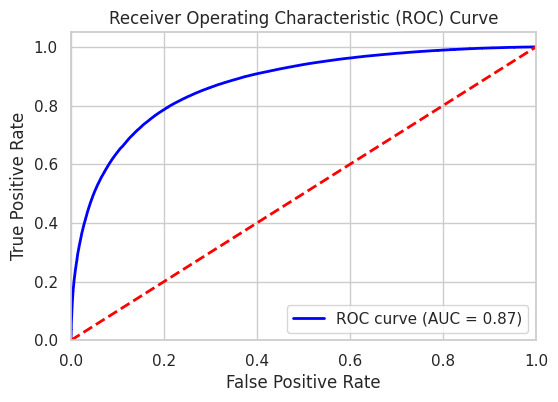

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_test_prob = logistic_regression.predict_proba(X_test_tfidf)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label=4)  # Assuming positive class is labeled as 4

# Calculate Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Saving the trained model

In [58]:
from joblib import dump

# Specify the file path to save the model
model_file_path = 'logistic_regression_model.joblib'

# Save the trained model to the specified file path
dump(logistic_regression, model_file_path)

print("Model saved to:", model_file_path)


Model saved to: logistic_regression_model.joblib


Using the saved model for future prediction

In [59]:
# Choose a sample index to check (e.g., the first sample)
sample_index = 50

# Get the text of the sample
sample_text = data.iloc[sample_index]
true_label = labels.iloc[sample_index]

# Predict the label for the sample
predicted_label = logistic_regression.predict(X_test_tfidf[sample_index])[0]

# Print the information
print("Sample Index:", sample_index)
print("Text:", sample_text)
print("True Label:", true_label)

# If you have predictions, print the predicted label
if 'predicted_label' in locals():
    print("Predicted Label:", predicted_label)


Sample Index: 50
Text: broadband plan a massive broken promise http tinyurlcomdcuc via wwwdiigocomtautao still waiting for broadband we are
True Label: 0
Predicted Label: 4


In [60]:
# Choose a sample index to check (e.g., the first sample)
sample_index = 0

# Get the text of the sample
sample_text = data.iloc[sample_index]

# Predict the label for the sample
predicted_label = logistic_regression.predict(X_test_tfidf[sample_index])[0]

# Interpret the predicted label
sentiment = "Positive" if predicted_label == 4 else "Negative"

# Print the information
print("Sample Text:", sample_text)
print("Predicted Sentiment:", sentiment)


Sample Text: switchfoot http twitpiccomyzl awww that s a bummer you shoulda got david carr of third day to do it d
Predicted Sentiment: Positive
